# **1.Problem Statement**

create a model to classify the Drug type based on Age, Gender, Blood pressure, Cholesterol and Na_to_K

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
import pickle
from sklearn.impute import SimpleImputer


# **2.Data Collection**

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/drug200.csv")    # importing the data

In [ ]:
df=data.copy()           # copying the original data into duplicate data

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# **3.Basic EDA**

In [ ]:
df.info()             # checking the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.duplicated().sum()   # Checking for duplicate values in the dataset

0

In [ ]:
df.isnull().sum()            #checking the null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df["Drug"].value_counts()     # checking whether the dataset is balanced or imbalanced

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df["Sex"].unique()                  # Sex feature contains two values male as M and female as F

array(['F', 'M'], dtype=object)

In [ ]:
df["BP"].unique()                    # BP feature contains three values HIGH,LOW and NORMAL

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df["Cholesterol"].unique()           # Cholesterol feature contains two values HIGH and NORMAL

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df["Drug"].unique()                     # Drug feature contains FIVE values DrugY,drugC,drugX,drugA and drugB

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df = df.astype(dtype = {'BP': 'category','Cholesterol':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# **4.Data Pre-processing**

In [ ]:
fv=df.iloc[:,0:5]                    # split data into features and class variables
cv=df.iloc[:,-1]

In [ ]:
fv.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
cv.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=3,stratify=cv)

In [ ]:
eda_df = pd.concat([x_train,y_train], axis= 1)

In [ ]:
eda_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
15,16,F,HIGH,NORMAL,15.516,drugY
162,43,M,NORMAL,NORMAL,12.859,drugX
169,20,F,HIGH,HIGH,11.262,drugA
152,55,M,NORMAL,NORMAL,7.261,drugX


# **5.EDA**

In [ ]:
high_bp_df = eda_df[eda_df['BP'] == 'HIGH']

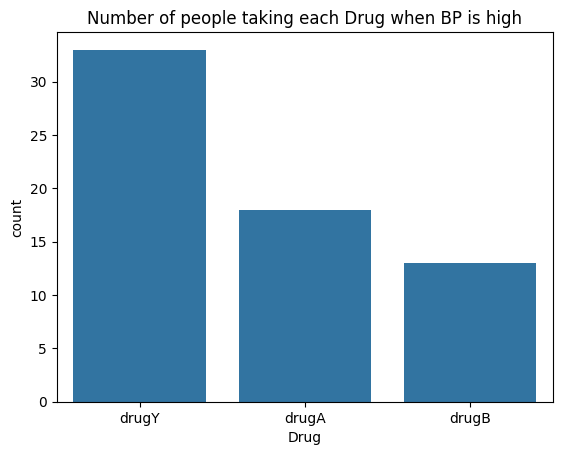

In [ ]:
sns.countplot(data = high_bp_df,x = high_bp_df['Drug'])
plt.title('Number of people taking each Drug when BP is high')
plt.show()

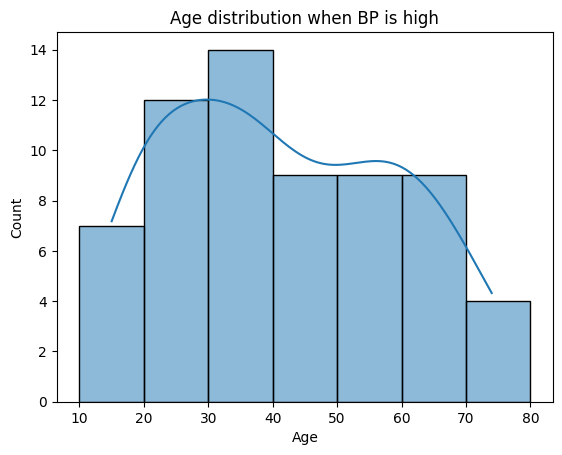

In [ ]:
sns.histplot(high_bp_df['Age'], bins= [10,20,30,40,50,60,70,80], kde= True)
plt.title('Age distribution when BP is high')
plt.show()

In [ ]:
high_cholesterol_df = eda_df[eda_df['Cholesterol'] == 'HIGH']

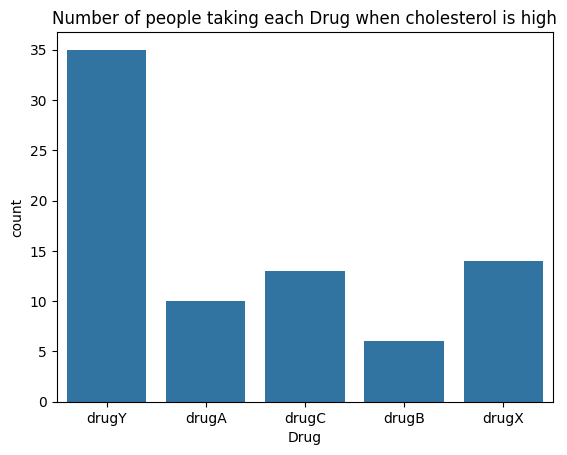

In [ ]:
sns.countplot(data = high_cholesterol_df, x = high_cholesterol_df['Drug'])
plt.title('Number of people taking each Drug when cholesterol is high')
plt.show()

In [ ]:
drug_age_avg = pd.DataFrame(eda_df.groupby(['Drug'])['Age'].mean())

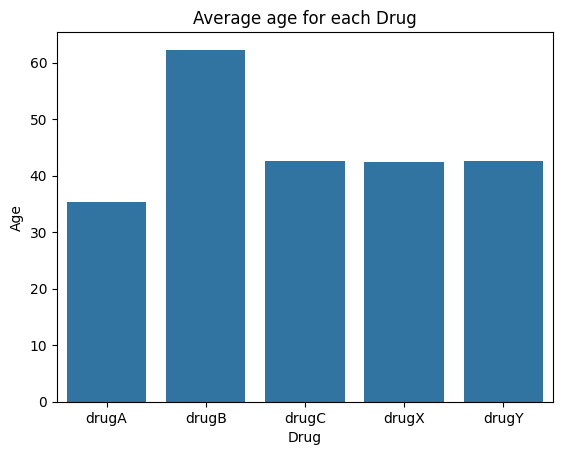

In [ ]:
sns.barplot(data = drug_age_avg, x = drug_age_avg.index, y = drug_age_avg['Age'])
plt.title('Average age for each Drug')
plt.show()

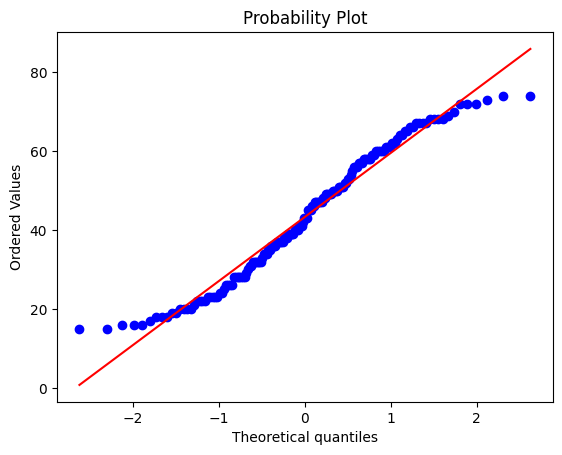

In [ ]:
ss.probplot(x_train['Age'], dist= 'norm', plot= plt)
plt.show()

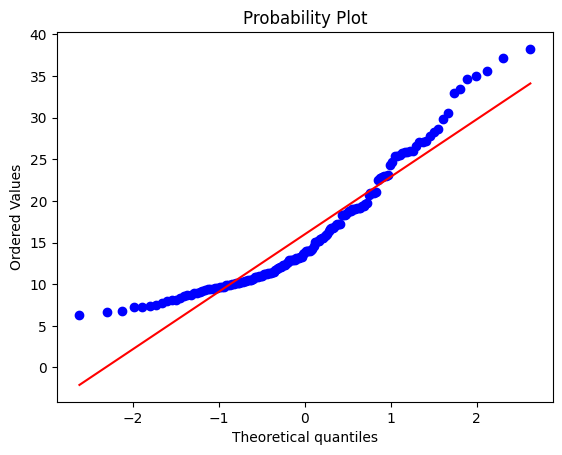

In [ ]:
ss.probplot(x_train['Na_to_K'], dist= 'norm', plot= plt)
plt.show()


# age and Na_to_K doesnot follow gaussian distribution so will use some functional transformations.

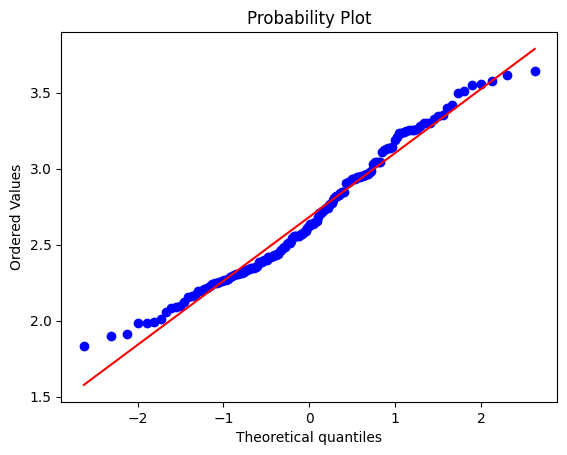

In [ ]:
ft = FunctionTransformer(func = np.log)
ss.probplot(ft.transform(x_train.Na_to_K),dist = "norm",fit = True,plot = plt)
plt.show()
# this is doesn't follows Gaussian perfectly, so we will use another functional transformation

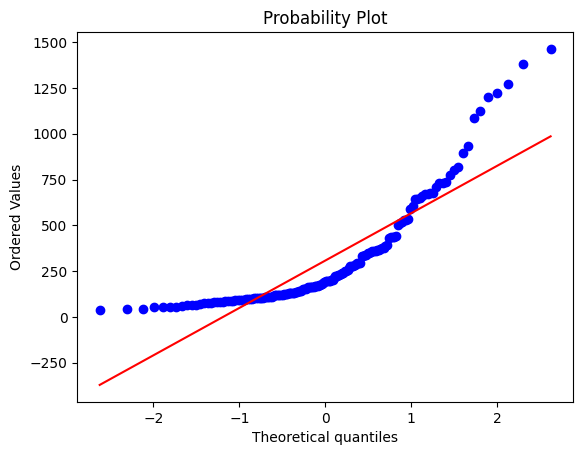

In [ ]:
ft = FunctionTransformer(func = np.square)
ss.probplot(ft.transform(x_train.Na_to_K),dist = "norm",fit = True,plot = plt)
plt.show()
# this is doesn't follows Gaussian perfectly, so we will use another functional transformation

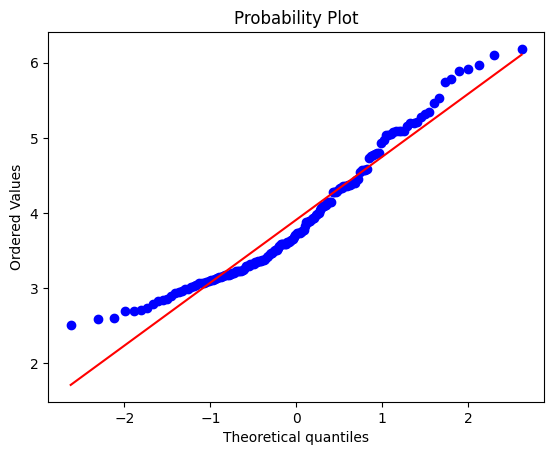

In [ ]:
ft = FunctionTransformer(func = np.sqrt)
ss.probplot(ft.transform(x_train.Na_to_K),dist = "norm",fit = True,plot = plt)
plt.show()
# this is doesn't follows Gaussian perfectly, so we will use another functional transformation

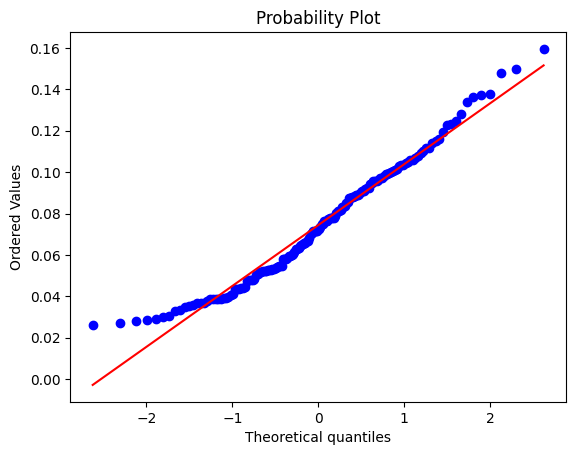

In [ ]:
def reci(x):
    return 1/x
ft = FunctionTransformer(func = reci)
ss.probplot(ft.transform(x_train.Na_to_K),dist = "norm",fit = True,plot = plt)
plt.show()
# this is doesn't follows Gaussian perfectly, so we will use power transformation

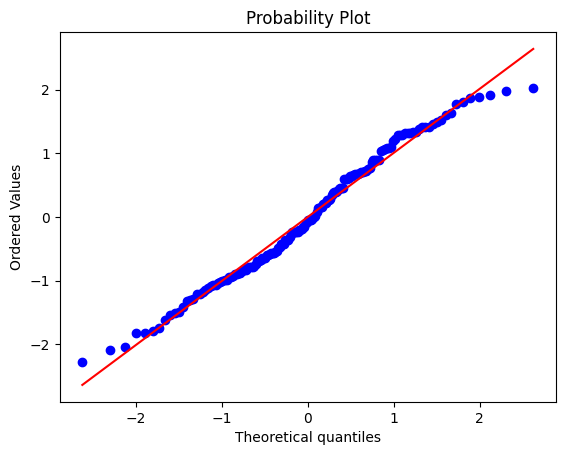

In [ ]:
pt=PowerTransformer()
ss.probplot(pt.fit_transform(x_train.Na_to_K.values.reshape(-1, 1)).ravel(),dist = "norm",fit = True,plot = plt)
plt.show()
# when we use power transfomer it is following Gaussian distribution

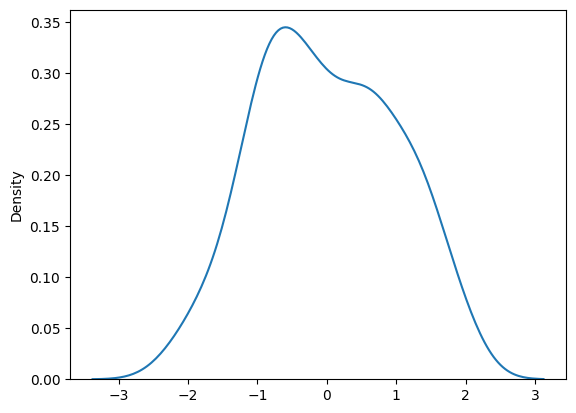

In [ ]:
sns.kdeplot(pt.fit_transform(x_train['Na_to_K'].values.reshape(-1,1)).ravel())
plt.show()

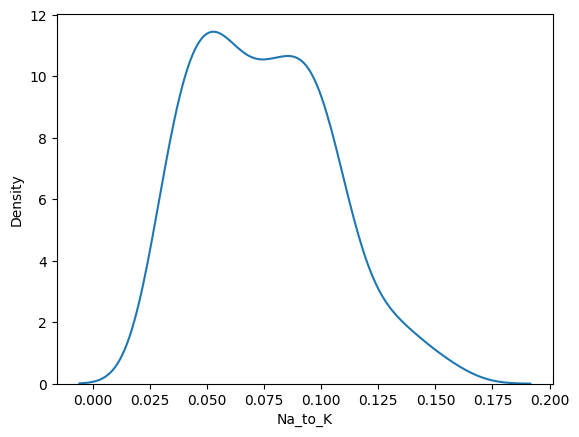

In [ ]:
sns.kdeplot(ft.fit_transform(x_train['Na_to_K']))
plt.show()

# **6.Feature Extraction**

In [ ]:
le=LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)

In [ ]:
y_train = pd.Series(y_train)

In [ ]:
y_test = le.transform(y_test)

In [ ]:
y_test = pd.Series(y_test)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 173
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          160 non-null    int64   
 1   Sex          160 non-null    object  
 2   BP           160 non-null    category
 3   Cholesterol  160 non-null    category
 4   Na_to_K      160 non-null    float64 
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
numerical_data = x_train.select_dtypes(include= ['int64','float64'])

In [ ]:
nominal_data = x_train.select_dtypes(include= ['object'])

In [ ]:
ordinal_data = x_train.select_dtypes(include= ['category'])

In [ ]:
numerical_pipe = Pipeline([('Null_values_imputation_1', SimpleImputer(strategy='mean')),
                           ('StandardScalar', StandardScaler()),
                           ('Power_Transform',PowerTransformer())])

In [ ]:
nominal_pipe = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('OH_Encoding', OneHotEncoder(sparse_output= False,drop= 'first'))])

In [ ]:
ordinal_pipe = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [ ]:
prepro_col_trans = ColumnTransformer(transformers= [('Ordinal_Pre-Processing', ordinal_pipe, ordinal_data.columns),
                                                    ('Nominal_Pre-Processing', nominal_pipe, nominal_data.columns),
                                                    ('numerical_Pre-Processing', numerical_pipe, numerical_data.columns)],
                                     remainder="passthrough")

In [ ]:
feature_extraction_pipe = Pipeline([('Pre-Processing',prepro_col_trans)])

In [ ]:
final_x_train = feature_extraction_pipe.fit_transform(x_train)

In [ ]:
final_x_test = feature_extraction_pipe.transform(x_test)

In [ ]:
feature_extraction_pipe.get_feature_names_out()

array(['Ordinal_Pre-Processing__BP',
       'Ordinal_Pre-Processing__Cholesterol',
       'Nominal_Pre-Processing__Sex_M', 'numerical_Pre-Processing__Age',
       'numerical_Pre-Processing__Na_to_K'], dtype=object)

# **7.Training**

In [ ]:
pip install mixed-naive-bayes

In [ ]:
from mixed_naive_bayes import MixedNB

In [ ]:
mixed_nb = MixedNB(categorical_features= [0,1,2])
model = mixed_nb.fit(final_x_train, y_train)

In [ ]:
print(classification_report(y_test, model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
pickle.dump(feature_extraction_pipe, open(r'/content/drive/MyDrive/Colab Notebooks/Drug_fetaure.pkl','wb'))

In [ ]:
pickle.dump(model, open(r"/content/drive/MyDrive/Colab Notebooks/Drug_model.pkl", 'wb'))